<a href="https://colab.research.google.com/github/FarazAhmad2/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

## <b> Data Description </b>

### <b> Demographic </b>

* ### Sex: male or female("M" or "F")
*  ### Age: Age of the patient; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### <b> Behavioral </b>

* ### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")  
* ### Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
 
### <b> Medical( history) </b>

* ### BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* ### Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* ### Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* ### Diabetes: whether or not the patient had diabetes (Nominal)

### <b> Medical(current) </b>

* ### Tot Chol: total cholesterol level (Continuous)
* ### Sys BP: systolic blood pressure (Continuous)
* ### Dia BP: diastolic blood pressure (Continuous)
* ### BMI: Body Mass Index (Continuous)
* ### Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* ### Glucose: glucose level (Continuous)

### <b> Predict variable (desired target) </b>

* ### 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [30]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import make_scorer, precision_score ,recall_score, f1_score
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
filepath = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Cardiovascular Risk Prediction - Faraz Ahmad/data_cardiovascular_risk.csv'
df = pd.read_csv(filepath)

In [4]:
# Checking shape pf dataframe
df.shape

(3390, 17)

In [5]:
# Checking top 5 entries
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# Checking bottom 5 entries
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
# Dropping id column as it is similar to index
df.drop(['id'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [9]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## <b> Handling Missing Data </b>

In [10]:
# Missing data counts and percentage
missing = df.columns[df.isnull().any()].tolist()

print('Missing Data Count')
print(df[missing].isnull().sum().sort_values(ascending = False))
print('--'*15)
print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [11]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  df[col] = df[col].fillna(df[col].median())

In [12]:
# Checking for duplicate values
len(df[df.duplicated()])

0

# <b> Exploratory Data Analysis </b>

In [13]:
# Lets check the categorical and numerical features
categorical_features = [col for col in df.columns if df[col].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


## <b> Handling Outliers </b>

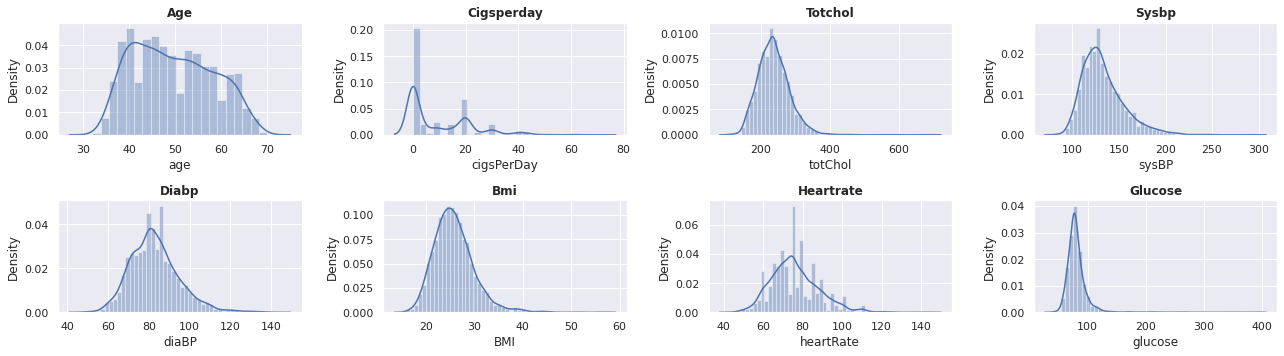

In [14]:
# Visualizing the distributions of numerical columns
plt.figure(figsize=(18,12))
for n,col in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.distplot(df[col])
  plt.title(f'{col.title()}',weight='bold')
  plt.tight_layout()

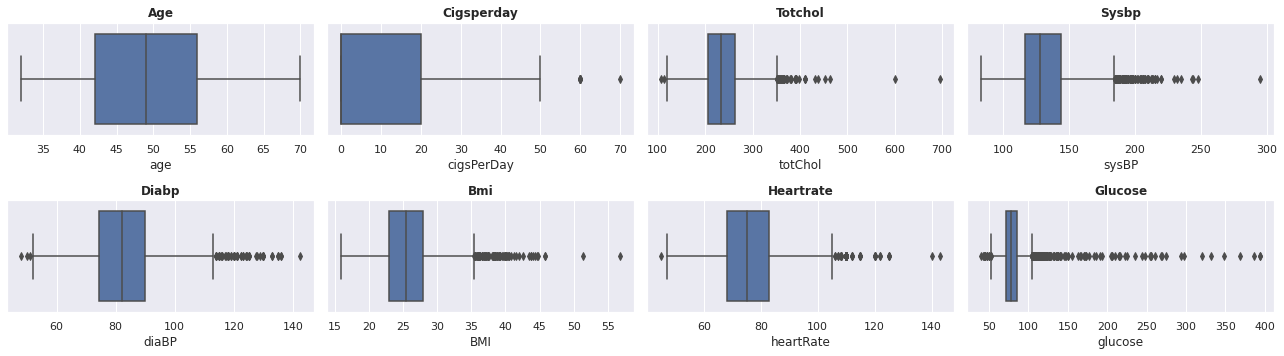

In [15]:
# Checking outliers using boxplot
plt.figure(figsize=(18,12))
for n,col in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[col])
  plt.title(f'{col.title()}',weight='bold')
  plt.tight_layout()

In [16]:
# Using IQR method to treat outliers
df1 = df.copy()
for col in numeric_features:
  q1, q2, q3 = df1[col].quantile([0.25,0.5,0.75])
  lower_lim = q1 - 1.5*(q3-q1)
  upper_lim = q3 + 1.5*(q3-q1)
  df1.loc[(df1[col]>upper_lim), col] = q2
  df1.loc[(df1[col]<lower_lim), col] = q2

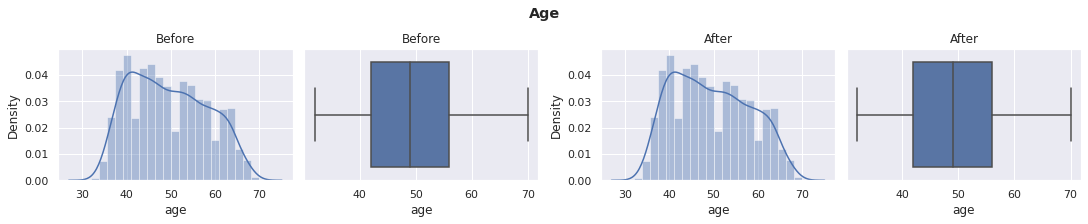

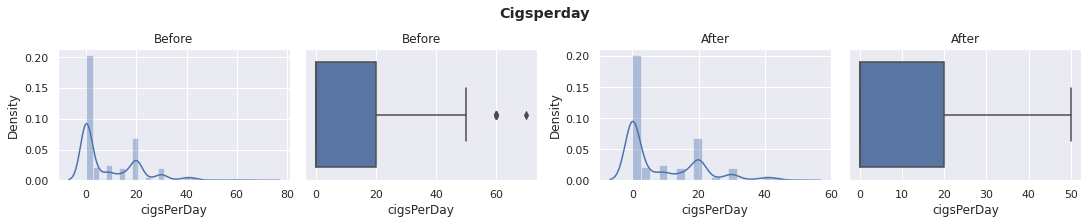

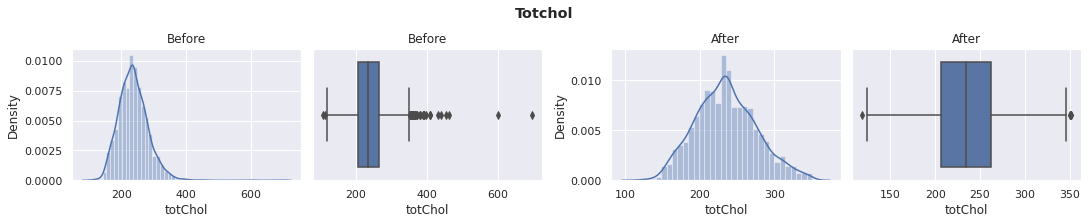

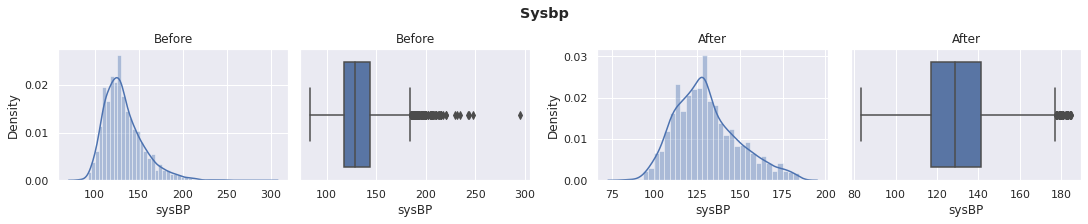

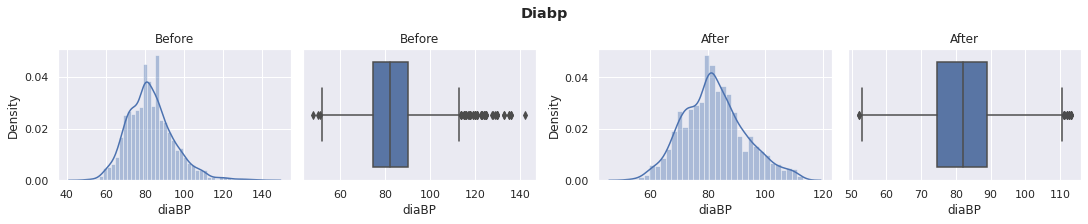

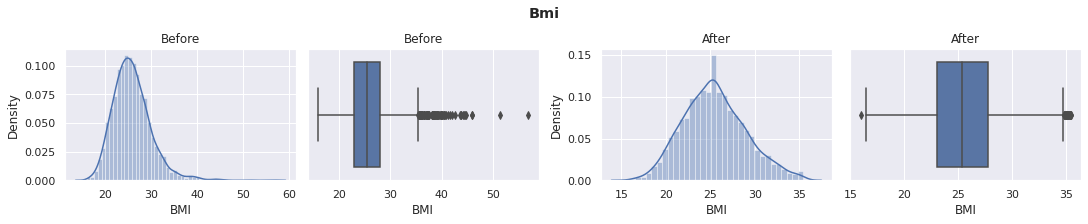

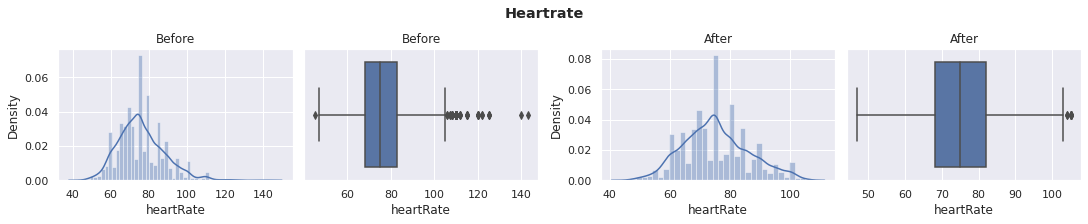

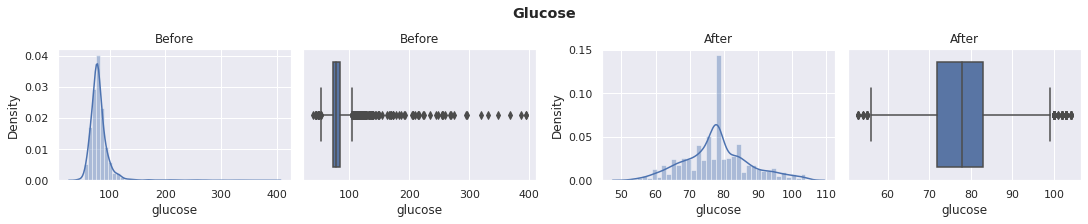

In [17]:
# Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(df1[col], ax=ax[2]).set(title="After")
  sns.boxplot(df1[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

In [18]:
# Data encoding
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df1 = df1.replace(encoder)

## <b> Univariate Analysis </b> 

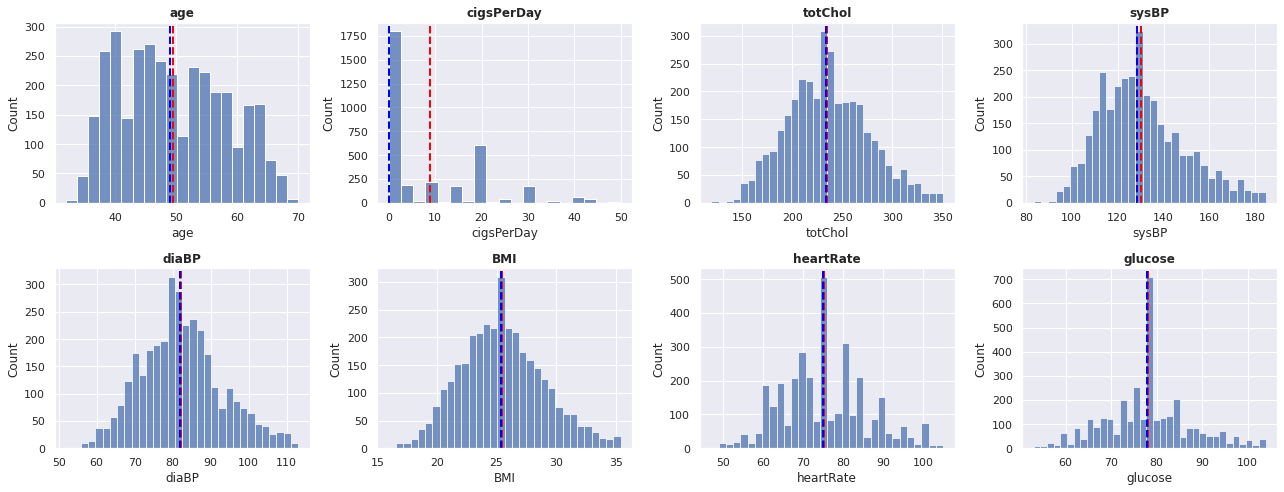

In [19]:
# Visualizing the mean and median of numeric features

plt.figure(figsize=(18,7))
for n,col in enumerate(numeric_features):
  feature = df1[col]
  ax=plt.subplot(2, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(col,weight='bold')
  plt.tight_layout()

## <b> Bivariate Analysis </b> 

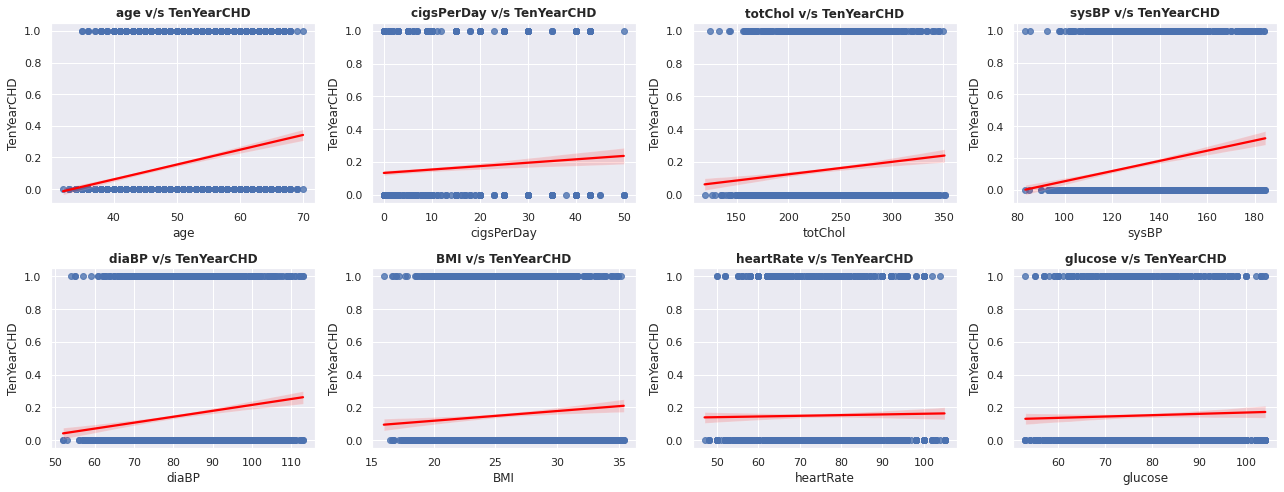

In [20]:
# Checking relationship between numeric features and target variable
plt.figure(figsize=(18,7))
for n,col in enumerate(numeric_features ):
  plt.subplot(2, 4, n+1)
  sns.regplot(x = df1[col], y =df1['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{col} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

## <b> Checking count distribution of Categorical features </b>

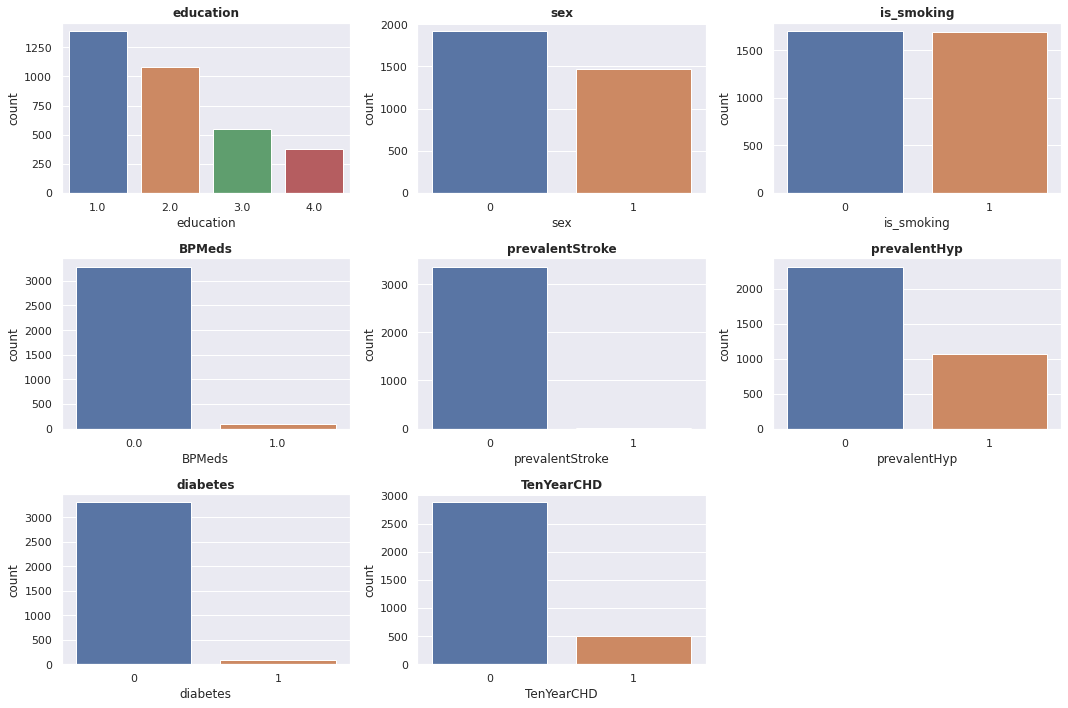

In [21]:
plt.figure(figsize=(15,10))
for n, col in enumerate(categorical_features):
  plt.subplot(3, 3, n+1)
  sns.countplot(df1[col])
  plt.title(col,weight='bold')
  plt.tight_layout()

#### Among the categorical features:
* #### BPMeds, prevalentStroke and diabetes are highly imbalanced.
* #### There are four levels of education whereas the rest categorical features are all binary.
* #### The number of Smokers and non-Smokers in is_smoking is almost the same.





## <b> Multivariate Analysis </b>

In [22]:
def line_plot(x,hue=None):
  plt.figure(figsize=(15,6))
  sns.lineplot(x=x, y='TenYearCHD', data=df1, hue=hue);

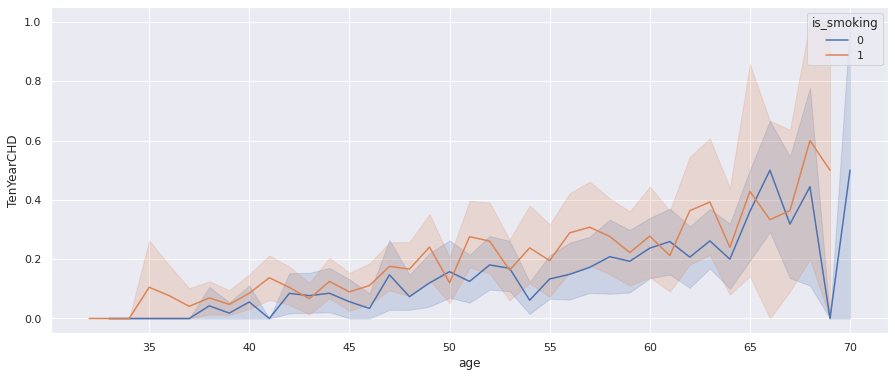

In [23]:
line_plot('age','is_smoking')

#### The chances of coronary heart disease increases with the increase in age.
#### Furthermore, if the person is a smoker, he/she is at a higher risk as compared to non smoker.

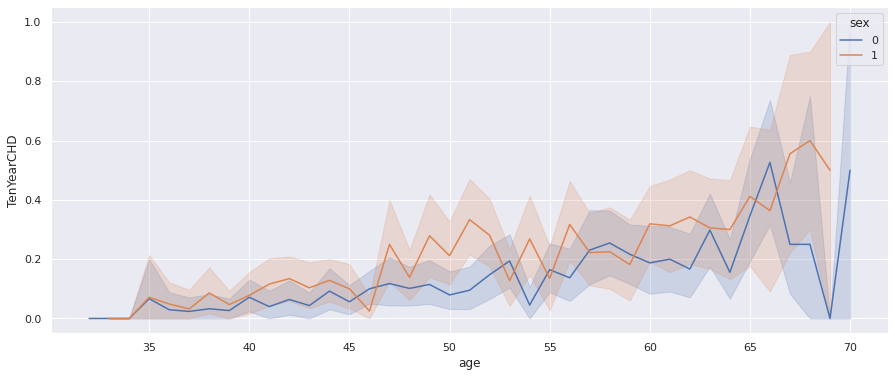

In [24]:
line_plot('age','sex')

#### The males have higher chances of getting a CHD as compared to females.

## <b> Handling Multicollinearity </b>

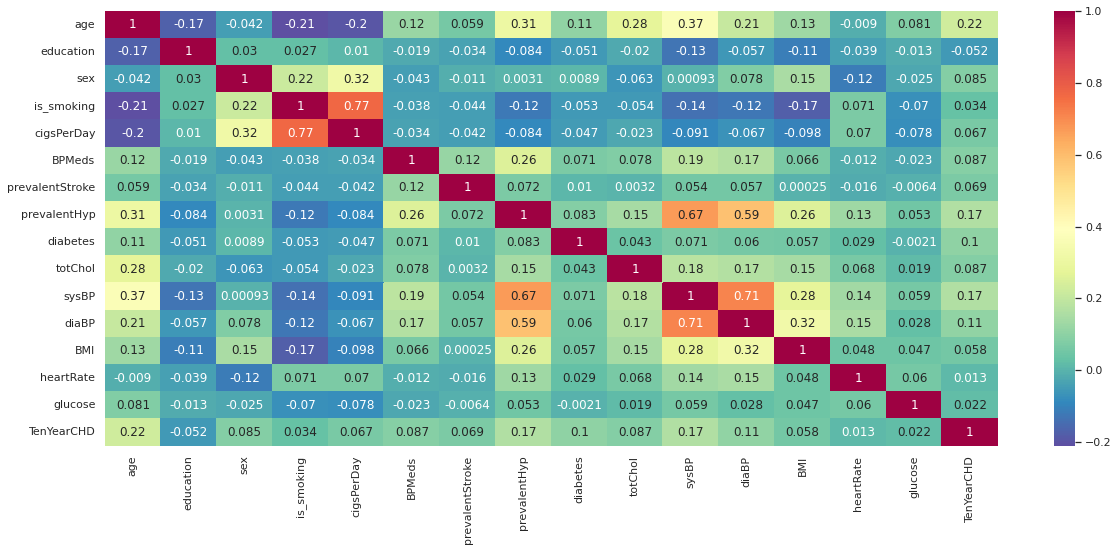

In [25]:
# Correlation
plt.figure(figsize=(20,8))
correlation = df1.corr()
sns.heatmap(correlation, annot=True, cmap='Spectral_r')
plt.show()

#### Multicollinearity occurs when two or more independent variables(also known as predictor) are highly correlated with one another in a regression model.

#### VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

#### or

#### VIF score of an independent variable represents how well the variable is explained by other independent variables.

# VIF = $\frac{1}{1-R^2}$

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [27]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,age,42.764967
1,education,4.831856
2,sex,2.148327
3,is_smoking,4.955409
4,cigsPerDay,4.195606
5,BPMeds,1.128283
6,prevalentStroke,1.026839
7,prevalentHyp,2.359065
8,diabetes,1.047201
9,totChol,37.646845


In [28]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['TenYearCHD','sysBP','diaBP','BMI','glucose','heartRate','totChol']]])

,variables,VIF
0,age,5.783020
1,education,4.134372
2,sex,1.971037
3,is_smoking,4.819767
4,cigsPerDay,4.154131
5,BPMeds,1.120403
6,prevalentStroke,1.025080
7,prevalentHyp,1.696524
8,diabetes,1.045086


# <b> Model building </b>

In [29]:
# Defining variables required
scaler = MinMaxScaler()
scoring = make_scorer(f1_score, pos_label=1)
features = [i for i in df1.columns if i not in ['TenYearCHD']]
independent_variables = [i for i in df1.columns if i not in ['TenYearCHD','sysBP','diaBP','BMI','glucose','heartRate','totChol']]

# Splitting the data into train and test
X = scaler.fit_transform(df1[independent_variables])
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 9)

# Handling class imbalance by oversampling followed by removing the Tomek link
X_smote, y_smote = SMOTETomek(random_state=15).fit_resample(X_train, y_train)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(f'{label} Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    2297
1     415
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
0    2215
1    2215
Name: TenYearCHD, dtype: int64 



In [106]:
def ml_model(model,X_train,X_test,y_train,y_test):

  # Fitting the model
  model.fit(X_train,y_train)

  for x,tru,label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    preds = model.predict(x)
    proba_preds = model.predict_proba(x)[:,1]
    # report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(tru, proba_preds)

    # Classification Report
    print(f'{label} Classification report')
    print(classification_report(tru,preds))
    print('----'*15,'\n')

     # Confusion Matrix
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(tru, preds), annot=True, cmap='Spectral_r')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')

    # AUC-ROC Curve
    plt.subplot(1,3,3)
    plt.plot(fpr, tpr, label=" AUC ="+str(round(auc(fpr, tpr),3)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend(loc='lower right')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{label} AUC - ROC curve")
    plt.tight_layout()
  plt.show()


In [119]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  feature = features
  importances = np.abs(optimal_model.coef_[0])
  indices = np.argsort(importances)

  plt.figure(figsize=(15,8))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

Train-Set Classification report
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      2215
           1       0.68      0.70      0.69      2215

    accuracy                           0.69      4430
   macro avg       0.69      0.69      0.69      4430
weighted avg       0.69      0.69      0.69      4430

------------------------------------------------------------ 

Test-Set Classification report
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       582
           1       0.24      0.64      0.34        96

    accuracy                           0.66       678
   macro avg       0.58      0.65      0.56       678
weighted avg       0.82      0.66      0.71       678

------------------------------------------------------------ 



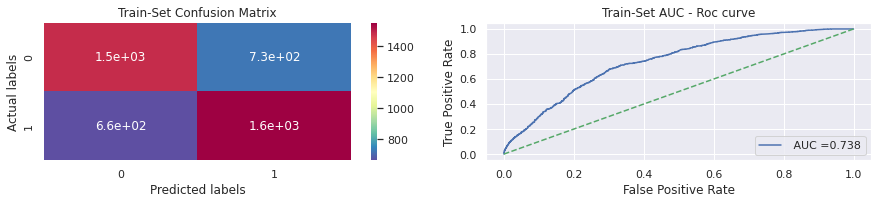

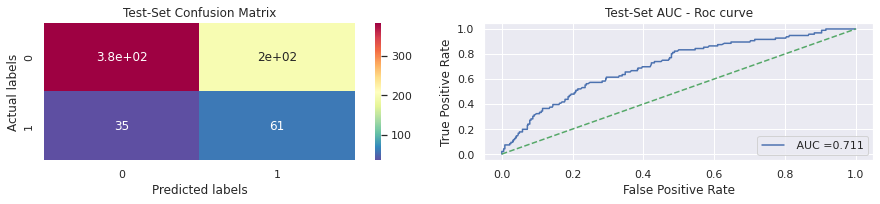

In [107]:
# Fitting Logistic Regression Model
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
ml_model(lr, X_smote, X_test, y_smote, y_test)

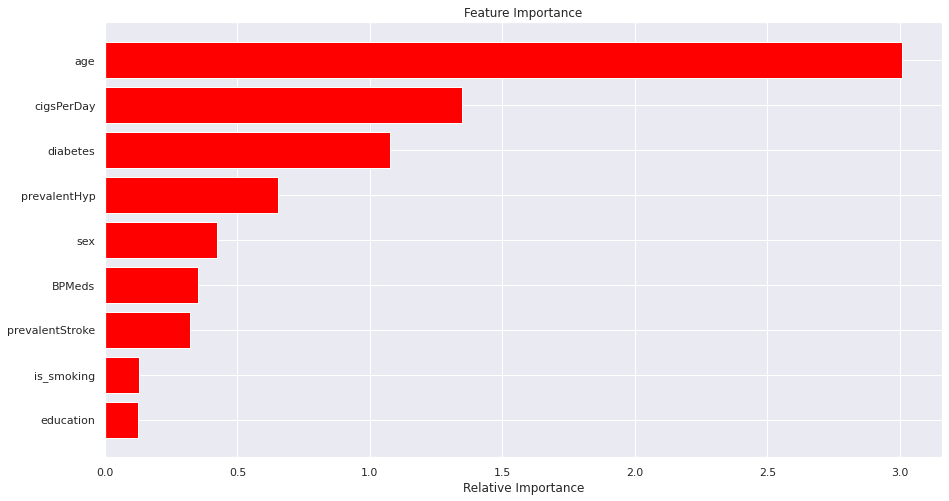

In [120]:
get_features_importance(lr,X_smote)